In [1]:
%reload_ext autoreload
%autoreload 2

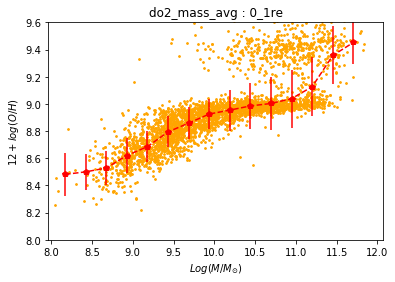

there is a group ['8082-6101' '8942-6103' '9193-12702' '9871-1901']


<Figure size 432x288 with 0 Axes>

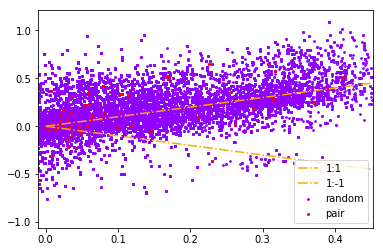

<Figure size 432x288 with 0 Axes>

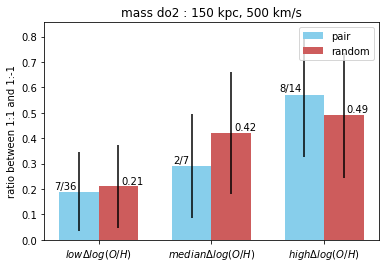

<Figure size 432x288 with 0 Axes>

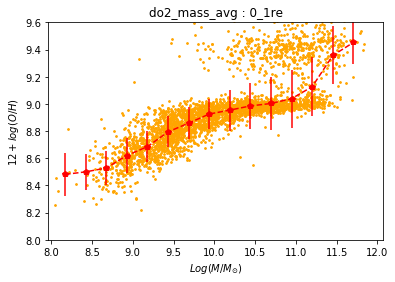

there is a group ['8078-3703' '8082-6101' '8942-6103' '9193-12702' '9871-1901']


<Figure size 432x288 with 0 Axes>

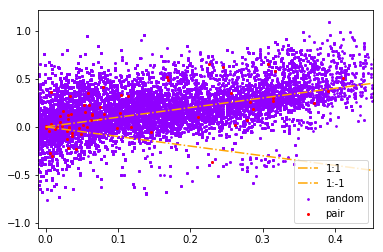

<Figure size 432x288 with 0 Axes>

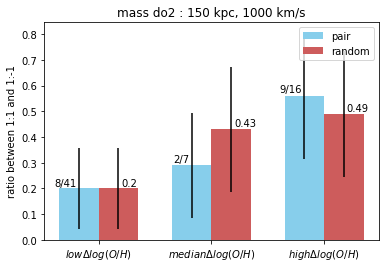

<Figure size 432x288 with 0 Axes>

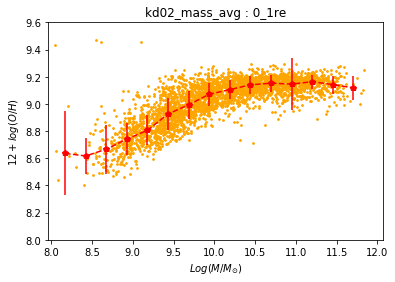

there is a group ['8082-6101' '8942-6103' '9193-12702' '9871-1901']


<Figure size 432x288 with 0 Axes>

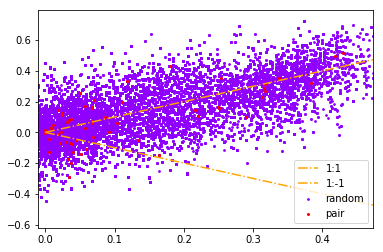

<Figure size 432x288 with 0 Axes>

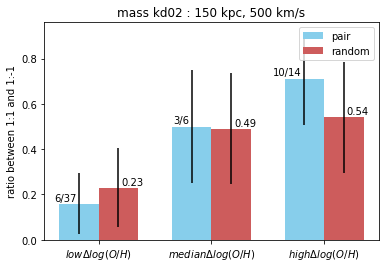

<Figure size 432x288 with 0 Axes>

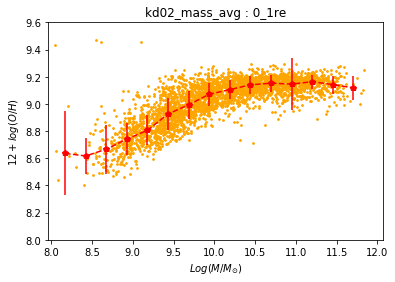

there is a group ['8078-3703' '8082-6101' '8942-6103' '9193-12702' '9871-1901']


<Figure size 432x288 with 0 Axes>

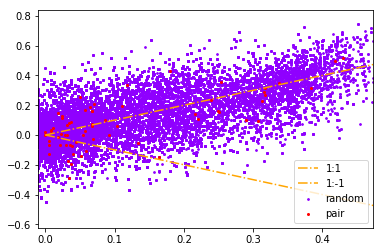

<Figure size 432x288 with 0 Axes>

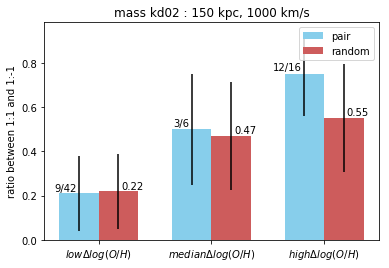

<Figure size 432x288 with 0 Axes>

In [33]:


from astropy.io import fits

import mz
import numpy as np

# =======
dir_mz = '/Users/astro/Documents/notebooks/zs/pair-m-z/mz/'
pair = '/Users/astro/Documents/notebooks/zs/2019-09-17/pair/'
dir1 = '/Users/astro/Documents/notebooks/zs/pair-m-z/mz/11-11/'
# =======


def m_z(plot, save, errorbar, dis, dvel, indicator_name,region,sf=False):
    with fits.open(dir_mz + 'z_%s_10_25.fits'%indicator_name) as f:
        
        data = f[1].data
        plateifu = data['plateifu']
        z_e = data['z_%s_e' % indicator_name]
        z = data['z_%s' % indicator_name]
        mass = data['mass_avg']
        if sf:
            region=region+'_sf'
            with fits.open('/Users/astro/Documents/notebooks/zs/pair-m-z/plateifu_sf.fits') as f_sf:
                data_sf=f_sf[1].data
                plateifu_sf=data_sf['plateifu']
                pifu,x_ind,y_ind=np.intersect1d(plateifu,plateifu_sf,return_indices=True)

                if np.array_equal(pifu,plateifu_sf):
                    z_e_sf=z_e[x_ind]
                    z_sf=z[x_ind]
                    mass_sf=mass[x_ind]

                    mask_mass=(mass_sf<10.25)
                    plateifu_sf_mass=plateifu_sf[mask_mass]
                    z_e_sf_mass=z_e_sf[mask_mass]
                    z_sf_mass=z_sf[mask_mass]
                    mass_sf_mass=mass_sf[mask_mass]
                    p = mz.mzr(plateifu_sf_mass,
                       z_sf_mass,
                       z_e_sf_mass,
                       indicator_name,
                       region,
                       mass_sf_mass,
                       'mass_avg',
                       dis,
                       dvel,
                       '19-09-29-22-46',
                       dir1,
                       pair,
                       plot=plot,
                       save=save,
                       errorbar=errorbar)
        else:
            p = mz.mzr(plateifu,
                       z,
                       z_e,
                       indicator_name,
                       region,
                       mass,
                       'mass_avg',
                       dis,
                       dvel,
                       '19-09-29-22-46',
                       dir1,
                       pair,
                       plot=plot,
                       save=save,
                       errorbar=errorbar)
    return

if __name__ == '__main__':
    indicator=['do2','kd02']
    dis=[150]
    dvel=[500,1000]
    for i in range(0,len(indicator)):
        indicator_i=indicator[i]
        for j in range(0,len(dis)):
            dis_j=dis[j]
            for k in range(0,len(dvel)):
                dvel_k=dvel[k]
            
                m_z(plot=True,
                    save=False,
                    errorbar=False,
                    dis=dis_j,
                    dvel=dvel_k,
                    indicator_name=indicator_i,
                    region='0_1re',
                    sf=False)

In [7]:
import numpy as np
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
a[2]
a[:,2]

array([3, 6, 9])

In [28]:
def a():
    print('a')
    def b():
        b=2
        return b
    c=1+b()
    print(c)
a()

a
3


In [5]:
a=[1,2,3]
b=['2','4']
a.append(b)
a

[1, 2, 3, ['2', '4']]

In [12]:
import numpy as np
a=[1,2,'3']
a=np.array(a,dtype=object)
c=np.append(a,b)
c=list(c)
c

[1, 2, '3', '2', '4']

# mz.py

[0, 0, 1.0, 0.0, 1.0, 0.0]

# txt2fits

In [2]:
from astropy.table import Table
table = Table.read('/Users/astro/Documents/notebooks/zs/pair-m-z/mz/z_do2_10_25.txt', format='ascii')
table.write('/Users/astro/Documents/notebooks/zs/pair-m-z/mz/z_do2_10_25.fits',format='fits')